In [2]:
import pandas as pd
answers = pd.read_csv('activities_timediaries.csv')
answers

,datetime,time,weekday,what,where,with_whom,mood
0,2022-10-25 13:30:00,13:30:00,Tuesday,Personal care,Home apartment /room,Alone,😁
1,2022-10-25 13:00:00,13:00:00,Tuesday,Personal care,Home apartment /room,Alone,😁
2,2022-10-25 12:30:00,12:30:00,Tuesday,Travelling,Changing locality,By bus/tram,NaN
3,2022-10-25 12:00:00,12:00:00,Tuesday,Other,Other university place,Alone,😁
4,2022-10-25 11:30:00,11:30:00,Tuesday,Other,Other university place,Alone,😁
...,...,...,...,...,...,...,...
713,2022-10-10 11:30:00,11:30:00,Monday,"Cooking, food preparation & management",Home apartment /room,Roommate(s),🙂
714,2022-10-10 11:00:00,11:00:00,Monday,"Cooking, food preparation & management",Home apartment /room,Roommate(s),😁
715,2022-10-10 10:30:00,10:30:00,Monday,"Cooking, food preparation & management",Home apartment /room,Roommate(s),😁
716,2022-10-10 10:00:00,10:00:00,Monday,Travelling,Study,By bus/tram,NaN


Sleeping                                               95
Personal care                                          92
Travelling                                             84
Social media (Facebook Instagram etc.)                 74
Walking                                                48
Study/work group                                       40
Rest/nap                                               39
Social life                                            37
Lecture/seminar/conference/university meeting          36
Household and family care                              34
Cooking, food preparation & management                 31
Watching TV, video, YouTube, etc.                      29
Did not do anything special                            26
Phone/Video calling                                    16
Break                                                  14
Other                                                   7
Reading                                                 7
Grocery Shoppi

<AxesSubplot:>

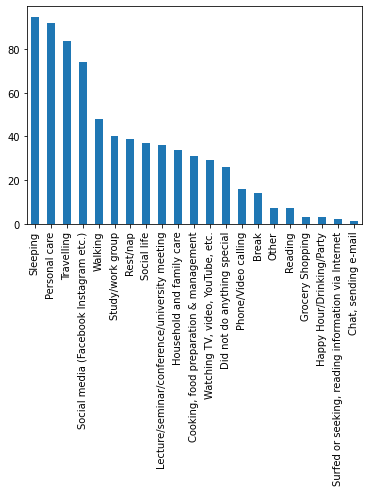

In [45]:
answers['what'].value_counts().plot(kind = 'bar')

In [13]:
df = answers

In [14]:
df = df.replace({'what' : {'Personal care' : 'Personal care', 
                      'Travelling' : 'Commuting', 
                      'Social media (Facebook Instagram etc.)': 'Social media',
                      'Walking': 'Commuting', 
                      'Study/work group': 'Study', 
                      'Rest/nap': 'Sleeping',
                      'Social life': 'Social life', 
                      'Lecture/seminar/conference/university meeting': 'Study',
                      'Household and family care': 'Chores',
                      'Cooking, food preparation & management': 'Chores',
                      'Watching TV, video, YouTube, etc.': 'Social media', 
                      'Did not do anything special': 'Rest',
                      'Phone/Video calling': 'Phone time',
                      'Break': 'Rest',
                      'Other': 'Rest',
                      'Reading': 'Rest', 
                      'Grocery Shopping': 'Chores', 
                      'Happy Hour/Drinking/Party': 'Social life',
                      'Surfed or seeking, reading information via Internet': 'Phone time',
                      'Chat, sending e-mail': 'Phone time'}})

<AxesSubplot:>

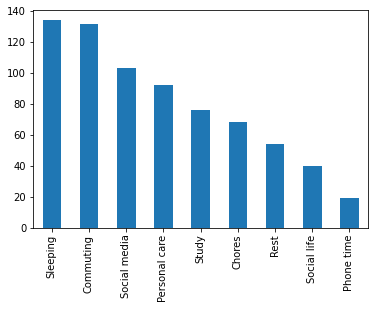

In [35]:
df['what'].value_counts().plot(kind='bar')

In [36]:
df.loc[df['what'] == 'Social life']['with_whom'].value_counts()

Roommate(s)     18
Friend(s)       16
Classmate(s)     6
Name: with_whom, dtype: int64

In [38]:
df.loc[df['what'] == 'Social media']['with_whom'].value_counts()

Alone          99
Roommate(s)     4
Name: with_whom, dtype: int64

In [39]:
df.loc[df['what'] == 'Study']['with_whom'].value_counts()

Alone           35
Classmate(s)    32
Friend(s)        8
Roommate(s)      1
Name: with_whom, dtype: int64

In [40]:
df.loc[df['what'] == 'Rest']['with_whom'].value_counts()

Alone          24
Roommate(s)    22
Friend(s)       8
Name: with_whom, dtype: int64

In [41]:
df.loc[df['what'] == 'Phone time']['with_whom'].value_counts()

Relative(s)    9
Alone          5
Partner        5
Name: with_whom, dtype: int64

In [42]:
df.loc[df['what'] == 'Personal care']['with_whom'].value_counts()

Alone        91
Friend(s)     1
Name: with_whom, dtype: int64

In [46]:
df.loc[df['what'] == 'Personal care']['where'].value_counts()

Home apartment /room                    85
Gym, swimming pool, Sports centre...     7
Name: where, dtype: int64

In [47]:
df.loc[df['what'] == 'Phone time']['where'].value_counts()

Home apartment /room    19
Name: where, dtype: int64

In [48]:
df.loc[df['what'] == 'Rest']['where'].value_counts()

Home apartment /room               41
Other university place              6
Café, pub, bar                      6
Countryside/mountain/hill/beach     1
Name: where, dtype: int64

In [49]:
df.loc[df['what'] == 'Study']['where'].value_counts()

Classroom / Study hall         39
Home apartment /room           30
University Library              6
Home garden/patio/courtyard     1
Name: where, dtype: int64

In [50]:
df.loc[df['what'] == 'Social media']['where'].value_counts()

Home apartment /room    103
Name: where, dtype: int64

In [51]:
df.loc[df['what'] == 'Social life']['where'].value_counts()

Home apartment /room    21
Café, pub, bar          17
In the street            2
Name: where, dtype: int64

In [21]:
df_1 = pd.read_csv('app_new-Copy1.csv')
df.rename(columns = {'datetime': 'timestamp'}, inplace = True)
df_1 = df_1[df_1.applicationname != 'Samsung One UI Home'] #remove system application
df_1 = df_1[df_1.applicationname != 'Android']#remove system apps
df_1 = df_1[df_1.applicationname != 'Android User Interface']
#df_1 = df_1[df_1.applicationname.notnull()] #remove nan when I was sleeping and didn't use anything
app_diary = pd.merge(df, df_1, on = 'timestamp')
app_diary = app_diary.drop_duplicates(keep = 'last')
app_diary

,timestamp,time,weekday,what,where,with_whom,mood,Unnamed: 0,applicationname
0,2022-10-25 13:30:00,13:30:00,Tuesday,Personal care,Home apartment /room,Alone,😁,83932,YouTube
1,2022-10-25 13:30:00,13:30:00,Tuesday,Personal care,Home apartment /room,Alone,😁,83933,YouTube
2,2022-10-25 13:30:00,13:30:00,Tuesday,Personal care,Home apartment /room,Alone,😁,83934,YouTube
3,2022-10-25 13:30:00,13:30:00,Tuesday,Personal care,Home apartment /room,Alone,😁,83935,YouTube
4,2022-10-25 13:30:00,13:30:00,Tuesday,Personal care,Home apartment /room,Alone,😁,83936,YouTube
...,...,...,...,...,...,...,...,...,...
5823,2022-10-10 09:30:00,09:30:00,Monday,Commuting,Study,By train,NaN,134146,Music
5824,2022-10-10 09:30:00,09:30:00,Monday,Commuting,Study,By train,NaN,134147,Music
5825,2022-10-10 09:30:00,09:30:00,Monday,Commuting,Study,By train,NaN,134148,Music
5826,2022-10-10 09:30:00,09:30:00,Monday,Commuting,Study,By train,NaN,134149,Music


<AxesSubplot:>

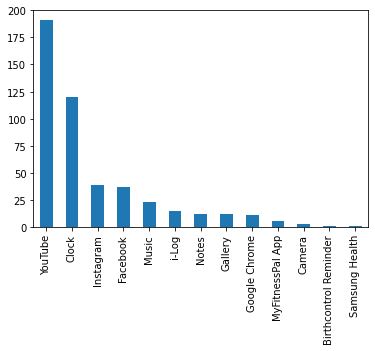

In [22]:
app_diary.loc[app_diary['what'] == 'Sleeping']['applicationname'].value_counts().plot(kind='bar')

<AxesSubplot:>

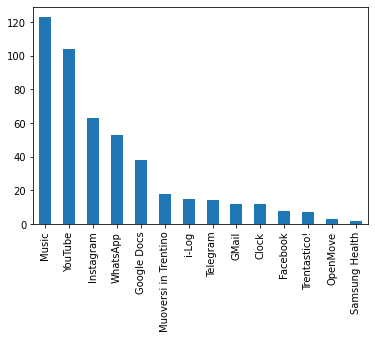

In [23]:
app_diary.loc[app_diary['what'] == 'Commuting']['applicationname'].value_counts().plot(kind='bar')

<AxesSubplot:>

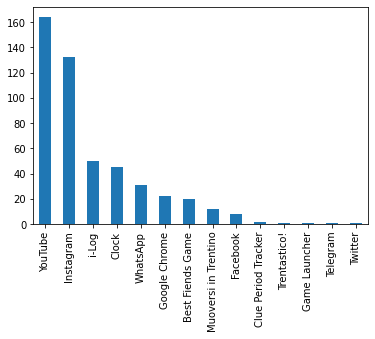

In [24]:
app_diary.loc[app_diary['what'] == 'Social media']['applicationname'].value_counts().plot(kind='bar')

<AxesSubplot:>

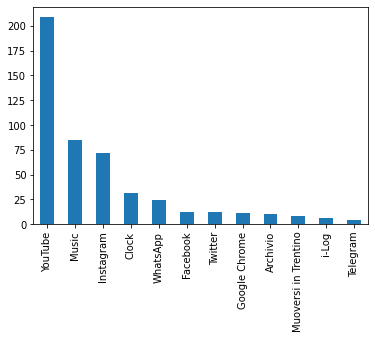

In [25]:
app_diary.loc[app_diary['what'] == 'Personal care']['applicationname'].value_counts().plot(kind='bar')

<AxesSubplot:>

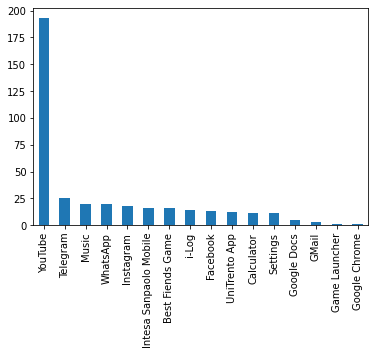

In [26]:
app_diary.loc[app_diary['what'] == 'Study']['applicationname'].value_counts().plot(kind='bar')

<AxesSubplot:>

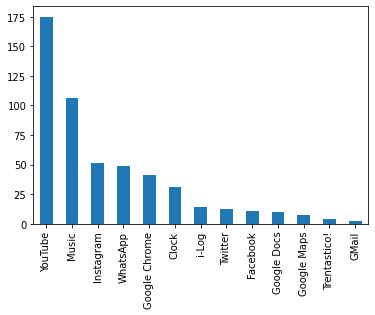

In [27]:
app_diary.loc[app_diary['what'] == 'Chores']['applicationname'].value_counts().plot(kind='bar')

<AxesSubplot:>

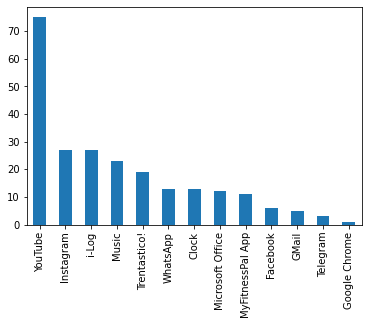

In [28]:
app_diary.loc[app_diary['what'] == 'Rest']['applicationname'].value_counts().plot(kind='bar')

<AxesSubplot:>

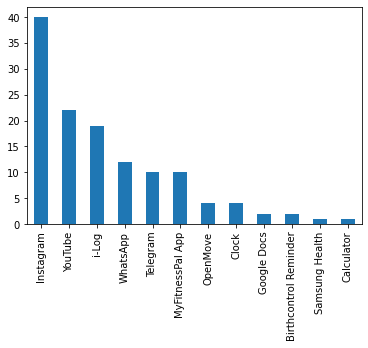

In [29]:
app_diary.loc[app_diary['what'] == 'Social life']['applicationname'].value_counts().plot(kind='bar')

<AxesSubplot:>

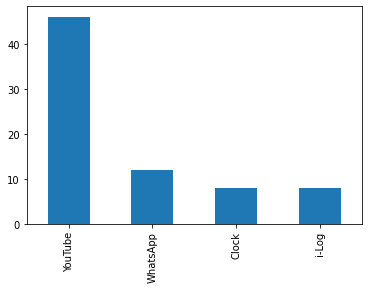

In [30]:
app_diary.loc[app_diary['what'] == 'Phone time']['applicationname'].value_counts().plot(kind='bar')